In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import math

# Plotting
import pygal
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# messy dataset
df = pd.read_csv('blood_data.csv')
df.head()

,"Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),""whether he/she donated blood in March 2007"""
0,"2 ,50,12500,98 ,1"
1,"0 ,13,3250,28 ,1"
2,"1 ,16,4000,35 ,1"
3,"2 ,20,5000,45 ,1"
4,"1 ,24,6000,77 ,0"


## Features information

---

_Recency_ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ - Last donation (months)

_Frequency_ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ - Total number times of donation

_Monetary_ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ - Total volume of blood donated (c.c.)

_Time_ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ - First donation (months)

_"Whether he/she donated blood in March 2007"_ $\;\;\;\;\;\;\;\;$ - Binary data (1: donated, 0: without donate)

In [3]:
# Rename the feature
df = df.rename(columns = {'Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"'
                          :'messy'})
df.head()

,messy
0,"2 ,50,12500,98 ,1"
1,"0 ,13,3250,28 ,1"
2,"1 ,16,4000,35 ,1"
3,"2 ,20,5000,45 ,1"
4,"1 ,24,6000,77 ,0"


In [4]:
#split dot into 5 columns

def split_dot():
    
    t = df['messy'].str.split(",", n = 4, expand = True).astype(int)
    
    #re-assign column
    df['recency_month'] = t[0]
    df['frequency'] = t[1]
    df['blood_cc'] = t[2]
    df['time_month'] = t[3]
    df['donate'] = t[4]
            
    print('max-recency_month: ', max(df['recency_month']))
    print('min-recency_month: ', min(df['recency_month']))
    print('\nmax-frequency: ', max(df['frequency']))
    print('min-frequency: ', min(df['frequency']))
    print('\nmax-blood_cc: ', max(df['blood_cc']))
    print('min-blood_cc: ', min(df['blood_cc']))
    print('\nmax-time_month: ', max(df['time_month']))
    print('min-time_month: ', min(df['time_month']))
        
    return df.head(10)

split_dot()

max-recency_month:  74
min-recency_month:  0

max-frequency:  50
min-frequency:  1

max-blood_cc:  12500
min-blood_cc:  250

max-time_month:  98
min-time_month:  2


,messy,recency_month,frequency,blood_cc,time_month,donate
0,"2 ,50,12500,98 ,1",2,50,12500,98,1
1,"0 ,13,3250,28 ,1",0,13,3250,28,1
2,"1 ,16,4000,35 ,1",1,16,4000,35,1
3,"2 ,20,5000,45 ,1",2,20,5000,45,1
4,"1 ,24,6000,77 ,0",1,24,6000,77,0
5,"4 ,4,1000,4 ,0",4,4,1000,4,0
6,"2 ,7,1750,14 ,1",2,7,1750,14,1
7,"1 ,12,3000,35 ,0",1,12,3000,35,0
8,"2 ,9,2250,22 ,1",2,9,2250,22,1
9,"5 ,46,11500,98 ,1",5,46,11500,98,1


In [5]:
if df.isnull().values.sum()>0:
    df = df.dropna()
    print('(rows,cols) => ', df.shape)
else:
    print('There is no missing value.')

There is no missing value.


In [6]:
# Drop messy column
df = df.drop(['messy'],axis=1)
df.head()

,recency_month,frequency,blood_cc,time_month,donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


---
## Formula for the rate of period of a donor will donate blood again

### <center> Rate of donating blood $=  \frac{(First\: donate\: -\: Recency)}{Frequency} $ (months per donate) </center>

In [7]:
# Count the rate of donating per month
df['rate'] = (df['time_month'] -df['recency_month'])/ df['frequency']
df.head()

,recency_month,frequency,blood_cc,time_month,donate,rate
0,2,50,12500,98,1,1.920000
1,0,13,3250,28,1,2.153846
2,1,16,4000,35,1,2.125000
3,2,20,5000,45,1,2.150000
4,1,24,6000,77,0,3.166667


Explanantion:

From the first row, we obtain the rate is 1.920000, which is also known as the expected period takes for the particular donor will donate once every 1.92 months. When the rate is zero, the particular donor is said to be never donate blood again.

---
## Classification of Rate ( Number of months per donation )

By defining, the donor who has only donated once in their past as a first-timer, while the donor who has donated more than once as a regular donor. 

Therefore, we want to estimate the expected number of months for a donor to donate again, hence we have to obtain the donors with donate more than once for further possible outcomes.

By grouping them into two different groups as shown.

**Rate = 0** $\;\;\;\;\;-\;\;\;\;\;$ *First-timer donor*

**Rate > 0** $\;\;\;\;\;-\;\;\;\;\;$ *Regular donor*


In [8]:
rate_first = len(df[(df['rate'] > 0)])
rate_regular = len(df[(df['rate'] == 0)])

print("There are", rate_first, "donors who are a first-timer donor,")
print("and", rate_regular, "donors who are a regular donor.")

There are 556 donors who are a first-timer donor,
and 192 donors who are a regular donor.


In [9]:
df['rate_status'] = "First_timer"
df['rate_status'] = np.where(df['rate'] >= 1, 'Regular', df['rate_status'])
df.head()

,recency_month,frequency,blood_cc,time_month,donate,rate,rate_status
0,2,50,12500,98,1,1.920000,Regular
1,0,13,3250,28,1,2.153846,Regular
2,1,16,4000,35,1,2.125000,Regular
3,2,20,5000,45,1,2.150000,Regular
4,1,24,6000,77,0,3.166667,Regular


In [10]:
# Descriptive statistics of the data
df.describe()

,recency_month,frequency,blood_cc,time_month,donate,rate
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968,4.332166
std,8.095396,5.839307,1459.826781,24.376714,0.426124,4.774425
min,0.000000,1.000000,250.000000,2.000000,0.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,3.500000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000,6.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,32.000000


In [11]:
df.groupby('donate')['recency_month','frequency','blood_cc', 'time_month','rate'].mean()

,recency_month,frequency,blood_cc,time_month,rate
donate,,,,,
0,10.771930,4.801754,1200.438596,34.770175,4.565490
1,5.455056,7.797753,1949.438202,32.719101,3.585003


In [12]:
# Generate new folder with clean dataset
df.to_csv(r'blood_donation.csv')


# Radar Plot
---

The radar plot is plotted with the *mean* value of each features.
With all these means, we can have a **better** glance of the *difference in
each features* between donors and non-donors. This would be explained further in the reports.

*Assigning the labels of each feature into a list named* `categories`.

In [13]:
categories = ['Recency', 'Frequency', 'Blood CC (in 100)', 'Time(Month, in 10)']

<h3>For Donors</h3>
Calculating the mean of each features (Recency, Frequecy, Blood in CC and Time in month) for <b>donors</b>.

***

`df.loc[df[donate'] == 1, ['recency_month']].mean()` 

This syntax retrieves the **mean** of the column named `recency_month` with row value of **1** in `donate` column.
The rest of the mean will be retrieved in the same way.

***

*Assigning the means into an array named* `donor`.

Combining the array `donor` with the first value from array `donor` using `np.concatenate()`.

In [14]:
recency_donor_mean = df.loc[df['donate'] == 1, ['recency_month']].mean()
frequeny_donor_mean = df.loc[df['donate'] == 1, ['frequency']].mean()
blood_donor_mean = df.loc[df['donate'] == 1, ['blood_cc']].mean() / 100
time_donor_mean = df.loc[df['donate'] == 1, ['time_month']].mean() / 10

donor = np.array([recency_donor_mean, frequeny_donor_mean, blood_donor_mean, time_donor_mean])
donor = np.concatenate((donor, [donor[0]]))

<h3>For Non-Donors</h3>
Calculating the mean of each features (Recency, Frequecy, Blood in CC and Time in month) for <b>non-donors</b>.

***

`df.loc[df[donate'] == 0, ['recency_month']].mean()` 

This syntax retrieves the **mean** of the column named `recency_month` with row value of **0** in `donate` column.
The rest of the mean will be retrieved in the same way.

***

Assigning the means into an array named `non_donor`.

Combining the array `non_donor` with the first value from array `non_donor` using `np.concatenatae()`.

In [15]:
recency_non_donor_mean = df.loc[df['donate'] == 0, ['recency_month']].mean()
frequeny_non_donor_mean = df.loc[df['donate'] == 0, ['frequency']].mean()
blood_non_donor_mean = df.loc[df['donate'] == 0, ['blood_cc']].mean() / 100
time_non_donor_mean = df.loc[df['donate'] == 0, ['time_month']].mean() / 10

non_donor = np.array([recency_non_donor_mean, frequeny_non_donor_mean, blood_non_donor_mean, time_non_donor_mean])
non_donor = np.concatenate((non_donor, [non_donor[0]]))

<h3>Calculating the position of each labels.</h3>

***

`np.linspace(start=0, stop=2*np.pi, num=len(donor))`

This syntax generates a linear space starting at **0** to **2π**, the distance between each label is determined by the number of attributes of the array `donor`. They will divide the 2π averagely.

In [16]:
label_position = np.linspace(start=0, stop=2*np.pi, num=len(donor))

<h3>Radar Chart Plotting</h3>

* For `plt.figure()` parameter `figsize=(6,6)` gives the width and heights of the chart in inches. 
* For `plt.subplot()` parameter `projection='polar'` tells that the features' means of both donors and non-donors are plotted in the same chart and projected in **polar** type.



* For `plt.plot()` parameters:
    1. `label_position` is the position of each features labels in the chart.
    2. `donor` and `non_donor` are the values to be plotted on polar axes.
    3. `pink` and `purple` are the lines color plotted.
    
    
    
* For `plt.fill()` parameters:
    1. `label_position` is the position of each features labels in the chart.
    2. `donor` and `non_donor` are the values to be plotted on polar axes.
    3. `pink` and `purple` are the colors of the region covered by each corresponding line.
    4. `alpha=0.1` means the filling color is lighter, whereby `alpha=0.3` is darker.
    
    
    
* For `plt.thetagrids()` parameters:
    1. `np.degrees(label_position)` refers to the angle of the theta gridline.
    2. `labels=categories` are the labels.
    
    
    
* For `plt.title()` parameters:
    1. `'Features of Donors and Non-Donors'` is the content of the title shown.
    2. `y=1.1` is the distance between the title and the top of the chart.
    3. `fontdict={'fontsize': 18}` is the fontsize of the title.



* For `plt.legend()` parameters:
    1. `labels=['Donors', 'Non-Donors']` indicates what does each line in the chart refers to.
    2. `loc=(0.95, 0.8)`: the first value indicates the distance between the legend and the left of the chart whereby the second value indicates te distance between the legend and the top of the chart.

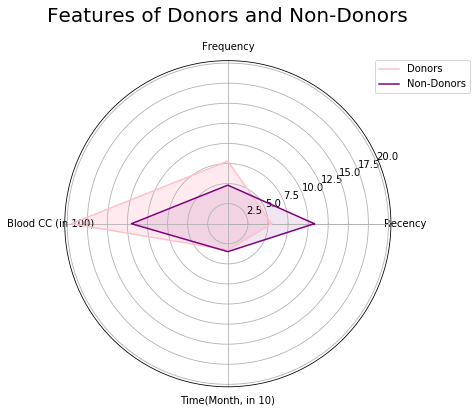

In [17]:
plt.figure(figsize=(6,6))
plt.subplot(projection='polar')
plt.plot(label_position, donor, 'pink')
plt.fill(label_position, donor, 'pink', alpha=0.3)

plt.plot(label_position, non_donor, 'purple')
plt.fill(label_position, non_donor, 'purple', alpha=0.1)


lines, labels = plt.thetagrids(np.degrees(label_position), labels=categories)
plt.title('Features of Donors and Non-Donors', y=1.1, fontdict={'fontsize': 20})
plt.legend(labels=['Donors', 'Non-Donors'], loc=(0.95, 0.9))

# Histogram
---

Histogram gives a clear view of the numbers of donors and non-donors in March 2017 based on each features. For example, we can see how much donors donated blood 2 months ago, the number of non-donors who donated a total of 1300 cc. of blood etc. 


<h3>For Donors</h3>

***

`df.loc[df[donate'] == 1, ['recency_month']].to_numpy()`. 

This syntax **converts** the dataframe values of the column named `recency_month` with row value of **1** in `donate` column into **numpy array** .
The rest of the features will be converted in the same way.

***


*Assigning the dataframe values, which has been convert to numpy array, to a* **new variable**.
Each features to individual variable. For example:
* The number of months since last donation `recency_month` to `recency_donor`.
* The total volume of blood (cc) donated `blood_cc` to `blood_donor`.

In [18]:
recency_donor = df.loc[df['donate'] == 1, ['recency_month']].to_numpy()
frequency_donor = df.loc[df['donate'] == 1, ['frequency']].to_numpy()
blood_donor = df.loc[df['donate'] == 1, ['blood_cc']].to_numpy() / 1000
time_donor = df.loc[df['donate'] == 1, ['time_month']].to_numpy()

<h3>Plotting Histogram with Subplots for Donors</h3>

* For `plt.figure()` parameter `figsize=(6,6)` gives the width and heights of the chart in inches. 
* For `plt.subplot()` parameter `2, 2, 1` refers to the number of rows, columns and position of the subplot respectievly.
    1. `2,2,1` is at top left.
    2. `2,2,2` is at top right.
    3. `2,2,3` is at bottom left.
    4. `2,2,4` is at bottom right.



* For `plt.xlabel()` & `plt.ylabel()` parameters gives the labels for x-axis and y-axis respectively.
    
   
   
    
* For `plt.hist()` paramters:
    1. *First parameter* takes in the values of the data.
    2. *Second parameter* indicates the number of bins.

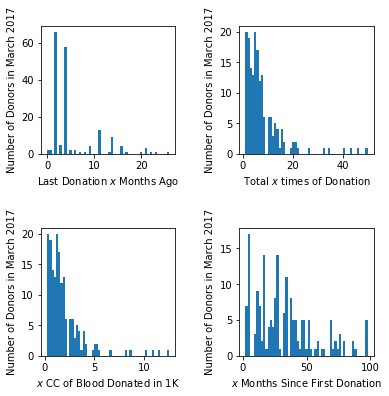

In [41]:
plt.figure(figsize=(6,6))
        
#Last Donations x Months Ago
plt.subplot(2,2,1)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('Last Donation $x$ Months Ago')
plt.hist(recency_donor, 50)

#x times of Donation
plt.subplot(2,2,2)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('Total $x$ times of Donation')
plt.hist(frequency_donor, 55)

#x CC of Blood Donated
plt.subplot(2,2,3)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('$x$ CC of Blood Donated in 1K')
plt.hist(blood_donor, 55)

#x Months Since First Donation
plt.subplot(2,2,4)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('$x$ Months Since First Donation')
plt.hist(time_donor, 55)

plt.tight_layout(pad=3.0)

plt.show()

<h3>For Non-Donors</h3>

***

`df.loc[df[donate'] == 0, ['recency_month']].to_numpy()`. 

This syntax **converts** the dataframe values of the column named `recency_month` with row value of **0** in `donate` column into **numpy array** .
The rest of the features will be converted in the same way.

***


*Assigning the dataframe values, which has been convert to numpy array, to a* **new variable**.
Each features to individual variable. For example:
* The number of months since last donation `recency_month` to `recency_non_donor`.
* The total volume of blood (cc) donated `blood_cc` to `blood_non_donor`.

In [20]:
recency_non_donor = df.loc[df['donate'] == 0, ['recency_month']].to_numpy()
frequency_non_donor = df.loc[df['donate'] == 0, ['frequency']].to_numpy()
blood_non_donor = df.loc[df['donate'] == 0, ['blood_cc']].to_numpy() / 1000
time_non_donor = df.loc[df['donate'] == 0, ['time_month']].to_numpy()

<h3>Plotting Histogram with Subplots for Non-Donors</h3>

* For `plt.figure()` parameter `figsize=(6,6)` gives the width and heights of the chart in inches. 
* For `plt.subplot()` parameter `2, 2, 1` refers to the number of rows, columns and position of the subplot respectievly.
    1. `2,2,1` is at top left.
    2. `2,2,2` is at top right.
    3. `2,2,3` is at bottom left.
    4. `2,2,4` is at bottom right.



* For `plt.xlabel()` & `plt.ylabel()` parameters gives the labels for x-axis and y-axis respectively.
    
   
   
    
* For `plt.hist()` paramters:
    1. *First parameter* takes in the values of the data.
    2. *Second parameter* indicates the number of bins.

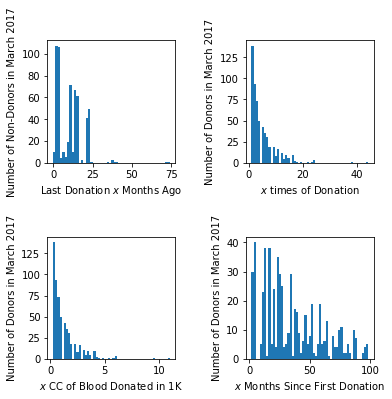

In [42]:
plt.figure(figsize=(6,6))
        
#Last Donations x Months Ago
plt.subplot(2,2,1)
plt.ylabel('Number of Non-Donors in March 2017')
plt.xlabel('Last Donation $x$ Months Ago')
plt.hist(recency_non_donor, 50)

#x times of Donation
plt.subplot(2,2,2)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('$x$ times of Donation')
plt.hist(frequency_non_donor, 55)

#x CC of Blood Donated
plt.subplot(2,2,3)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('$x$ CC of Blood Donated in 1K')
plt.hist(blood_non_donor, 55)

#x Months Since First Donation
plt.subplot(2,2,4)
plt.ylabel('Number of Donors in March 2017')
plt.xlabel('$x$ Months Since First Donation')
plt.hist(time_non_donor, 55)

plt.tight_layout(pad=3.0)

plt.show()

# Boxplot 
---
There are 4 different boxplots for each of _Recency_, _Frequency_,
_Monetary_, and _Time_. Each of the box plot are plotted with two
variation, those who donated blood on March 2017 or not. 

All 4 of the plots are put in a one by four grid (`plt.subplot(1,4,n)`) with the size 17 times 20 units (`plt.figure(figsize = (17,20), dpi=80)`), each of them have different title and label corresponding to each datatype used.

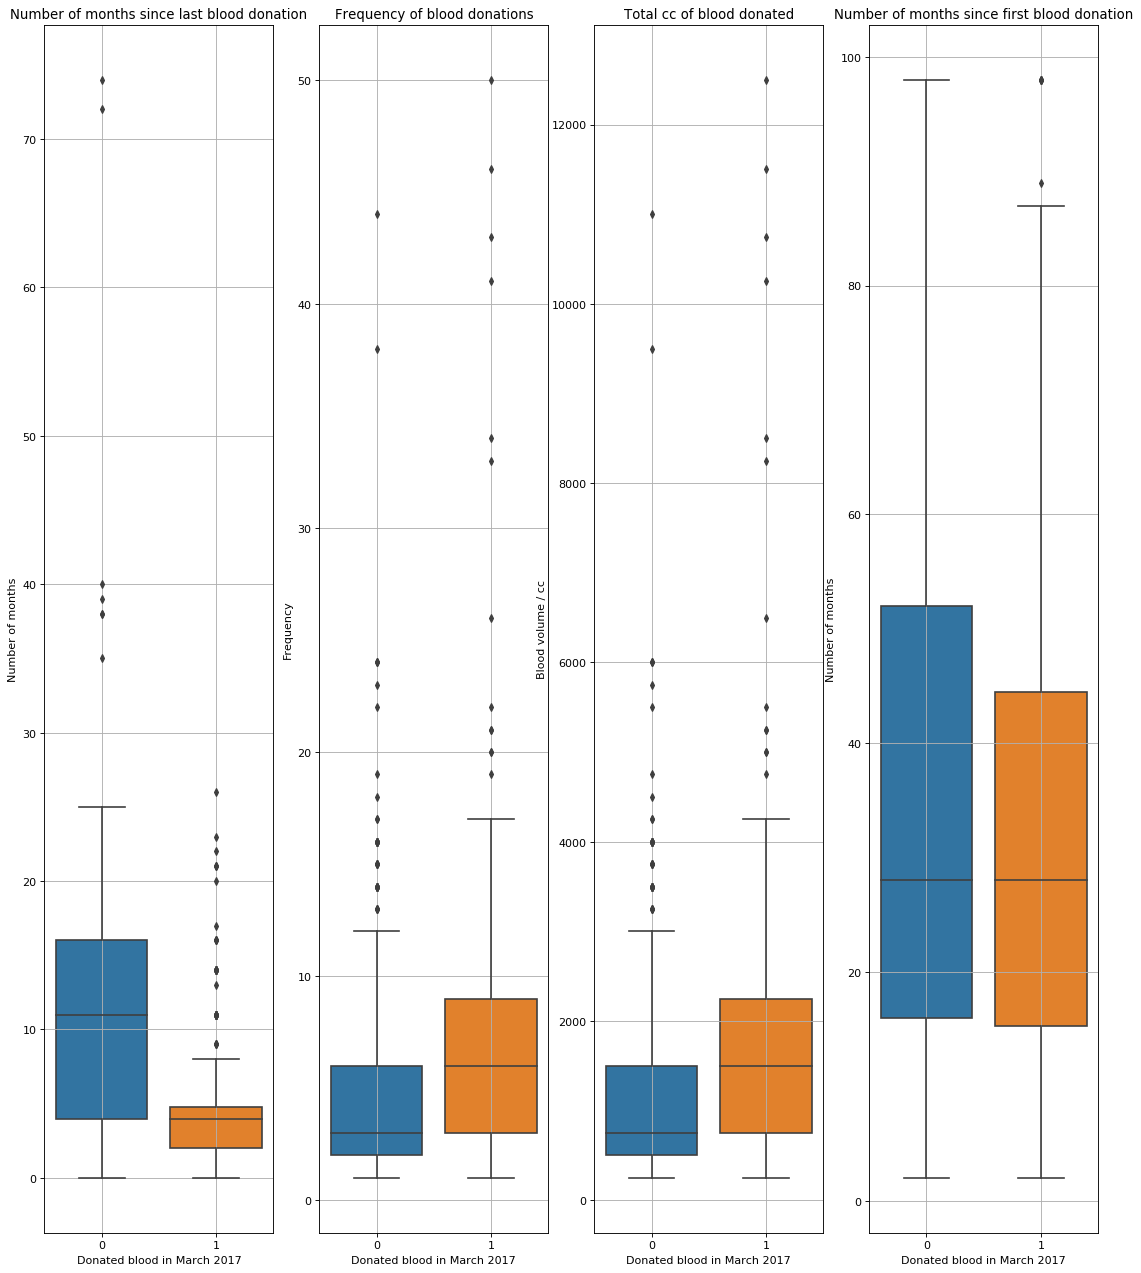

In [22]:
#Creating subplot for the different boxplots

plt.figure(figsize = (17,20), dpi=80)
plt.subplot(1,4,1)
sns.boxplot(x='donate', y='recency_month', data = df)
plt.title('Number of months since last blood donation')
plt.xlabel('Donated blood in March 2017')
plt.ylabel('Number of months')
plt.grid()

plt.subplot(1,4,2)
sns.boxplot(x='donate', y='frequency', data = df)
plt.title('Frequency of blood donations')
plt.xlabel('Donated blood in March 2017')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1,4,3)
sns.boxplot(x='donate', y='blood_cc', data = df)
plt.title('Total cc of blood donated')
plt.xlabel('Donated blood in March 2017')
plt.ylabel('Blood volume / cc')
plt.grid()

plt.subplot(1,4,4)
sns.boxplot(x='donate', y='time_month', data = df)
plt.title('Number of months since first blood donation')
plt.xlabel('Donated blood in March 2017')
plt.ylabel('Number of months')
plt.grid()


# Scatter Plot
---

This is the scatter plot of _Frequency_ against _Duration_.

_Duration_ is the time between first blood donation (`time_month`) minus
number of months passed after the last blood donation (`recency_month`). 

The plot are in the the size of 15 times 15 units (`plt.figure(figsize = (15,15))`), this is to give enough space for each points can be seen easily in the plots.

In [23]:
# Data preprocessing for scatter plot

duration = df['time_month'] - df['recency_month']

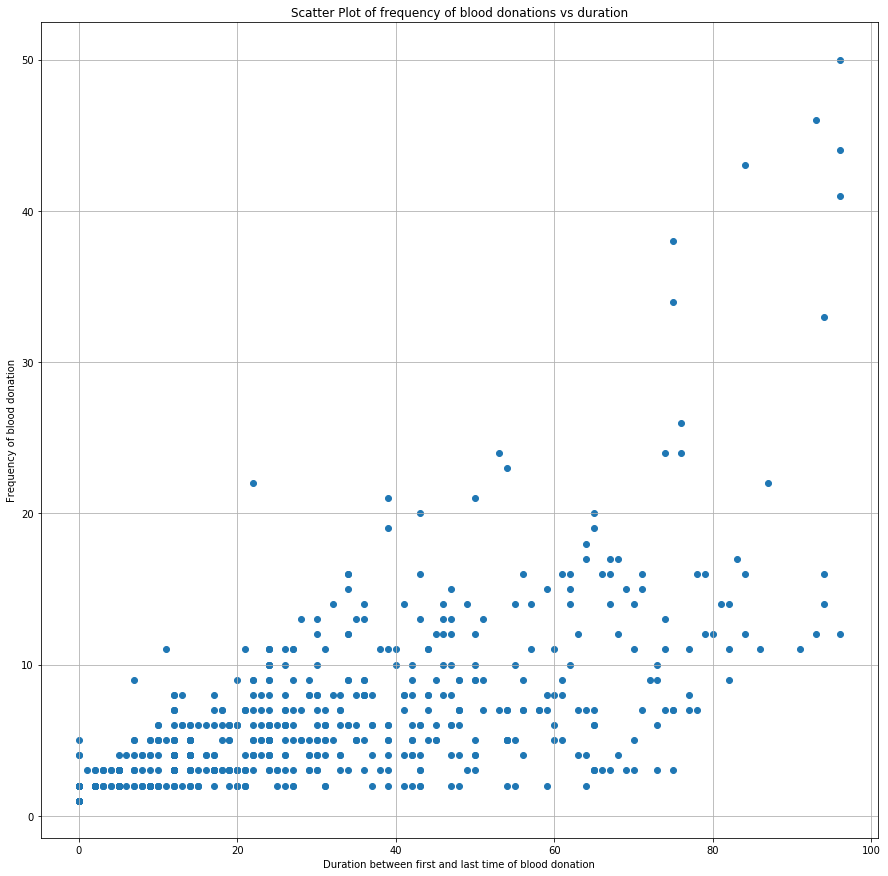

In [24]:
# Scatter Plot

plt.figure(figsize=(15,15))
plt.scatter(duration, df['frequency'])
plt.title('Scatter Plot of frequency of blood donations vs duration')
plt.xlabel('Duration between first and last time of blood donation')
plt.ylabel('Frequency of blood donation')
plt.grid()


# Line Plot
---

* Noted: Create `def` function and return the Line plot visualization graphs
* `plt.subplot()`$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$- number of rows and columns for the position plot.
* `value_counts()`$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$- count each of the element independently.
* `sort_index()`$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$- rearrange ordering by default
* `dpi`$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$- dots per inch (get clear of visualization) 
* `df[df['column'] == value]`$\;$ - filter dataframe of specific column by desired value

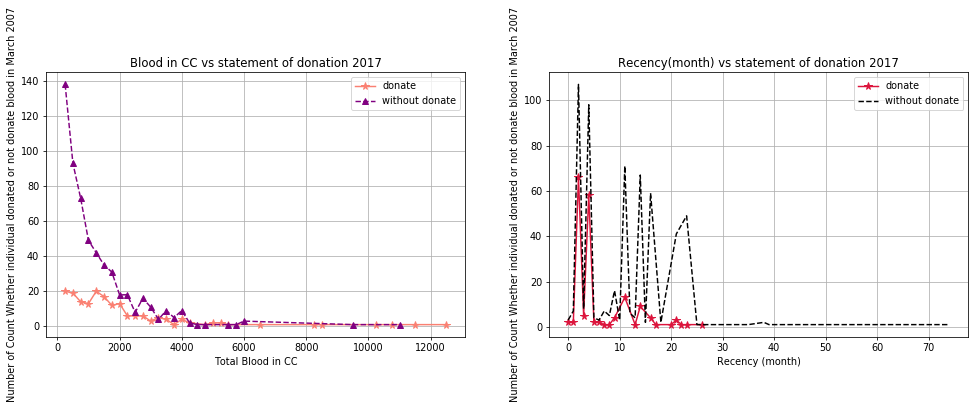

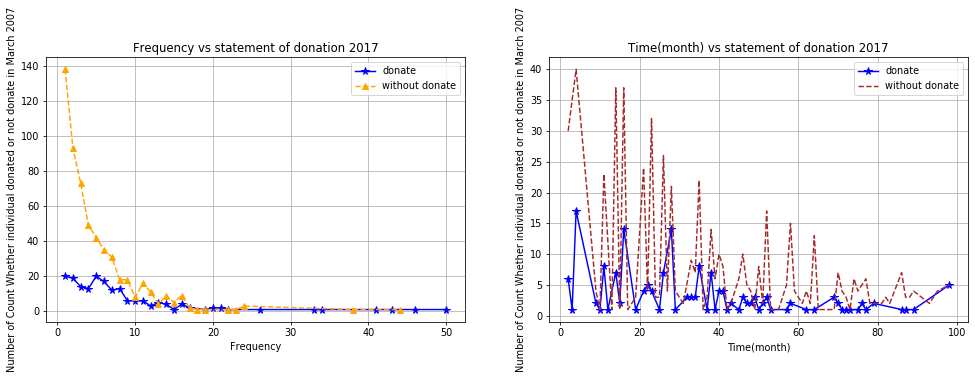

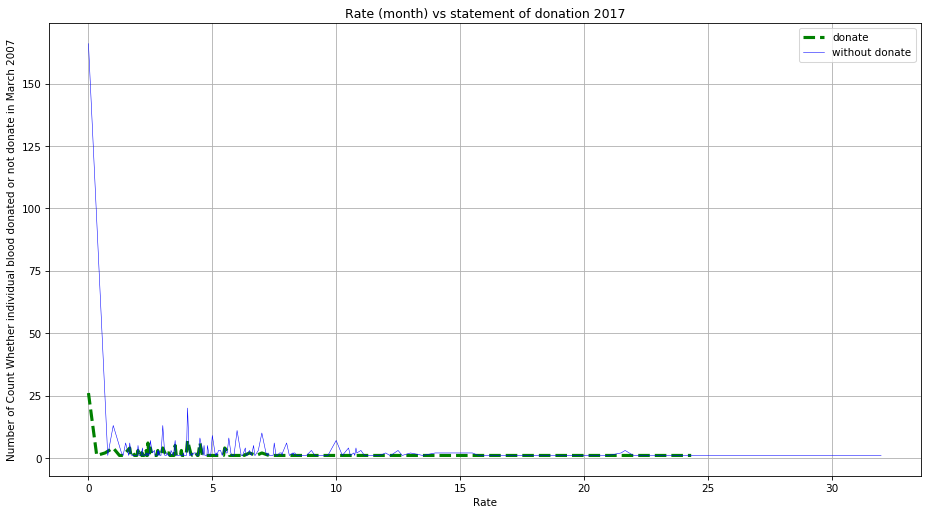

In [25]:
def line_plot():
    
    # donate {1,0} vs blood_cc
    fig,ax1=plt.subplots(2,1,figsize=(17,5),dpi=70)
    blood_max = df['blood_cc'].max()
    blood_min = df['blood_cc'].min()
    plt.subplot(1,2,1)
    plt.plot(df[df['donate']==1]['blood_cc'].value_counts().sort_index(),color = 'salmon',linestyle='-',marker='*',markersize=8)
    plt.plot(df[df['donate']==0]['blood_cc'].value_counts().sort_index(), color= 'purple',marker='^', linestyle='--',markersize=6)
    plt.grid()
    plt.xlabel('Total Blood in CC')
    plt.ylabel('Number of Count Whether individual donated or not donate blood in March 2007')
    plt.legend(['donate','without donate'],loc='best')
    plt.title('Blood in CC vs statement of donation 2017')


    # donate {1,0} vs recency_month
    plt.subplot(1,2,2)
    plt.plot(df[df['donate']==1]['recency_month'].value_counts().sort_index(),color = 'crimson',linestyle='-',marker='*',markersize=8)
    plt.plot(df[df['donate']==0]['recency_month'].value_counts().sort_index(), color= 'black', linestyle='--',markersize=6)
    plt.grid()
    plt.xlabel('Recency (month)')
    plt.ylabel('Number of Count Whether individual donated or not donate blood in March 2007')
    plt.legend(['donate','without donate'],loc='best')
    plt.title('Recency(month) vs statement of donation 2017')
    
    ## donate {1,0} vs frequency
    fig,ax1=plt.subplots(2,1,figsize=(17,5),dpi=70)
    plt.subplot(1,2,1)
    plt.plot(df[df['donate']==1]['frequency'].value_counts().sort_index(),color = 'blue',linestyle='-',marker='*',markersize=8)
    plt.plot(df[df['donate']==0]['frequency'].value_counts().sort_index(), color= 'orange',marker='^', linestyle='--',markersize=6)
    plt.grid()
    plt.xlabel('Frequency')
    plt.ylabel('Number of Count Whether individual donated or not donate in March 2007')
    plt.legend(['donate','without donate'],loc='best')
    plt.title('Frequency vs statement of donation 2017')

    # donate {1,0} vs time_month
    plt.subplot(1,2,2)
    plt.plot(df[df['donate']==1]['time_month'].value_counts().sort_index(),color = 'blue',linestyle='-',marker='*',markersize=8)
    plt.plot(df[df['donate']==0]['time_month'].value_counts().sort_index(), color= 'brown', linestyle='--',markersize=6)
    plt.grid()
    plt.xlabel('Time(month)')
    plt.ylabel('Number of Count Whether individual donated or not donate in March 2007')
    plt.legend(['donate','without donate'],loc='best')
    plt.title('Time(month) vs statement of donation 2017')
    
    
    # donate {1,0} vs rate
    fig,ax1=plt.subplots(figsize=(15,8),dpi =75)
    plt.plot(df[df['donate']==1]['rate'].value_counts().sort_index(),color = 'green',linestyle='--',linewidth=3)
    plt.plot(df[df['donate']==0]['rate'].value_counts().sort_index(), color= 'blue', linestyle='-',linewidth=0.5,)
    plt.grid()
    plt.xlabel('Rate')
    plt.ylabel('Number of Count Whether individual blood donated or not donate in March 2007')
    plt.legend(['donate','without donate'],loc='best')
    plt.title('Rate (month) vs statement of donation 2017')
   

    return plt.show()

line_plot()


# Stripplot
---

* Noted: Create `def` function and return the Strip plot of visualization graphs
* `plt.stripplot()`$\;\;$- simmilary to scatter plot, using categorical variable
* `hue`$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$- to determine which column should be used for colour encoding.
* `jitter`$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$- adjust the variability of horizontal or vertical data visualization.

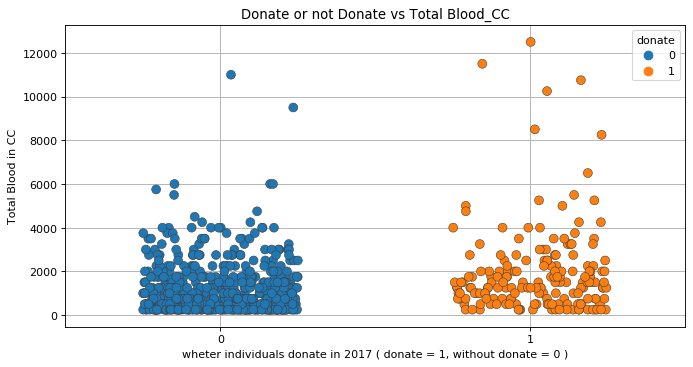

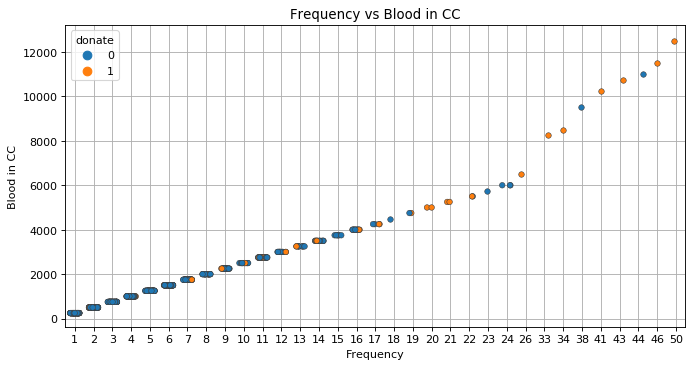

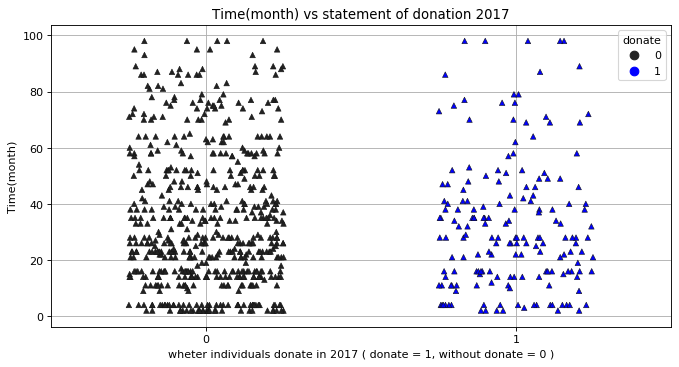

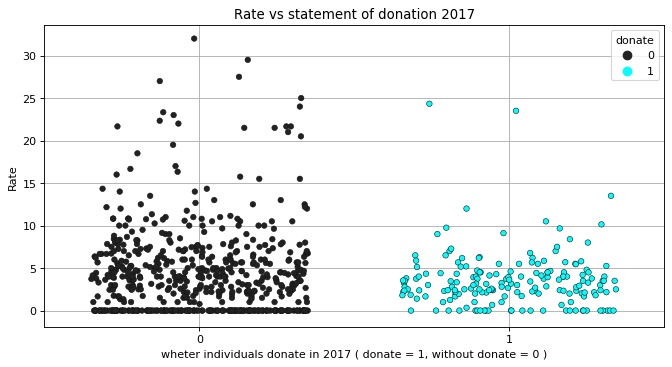

In [26]:

#stripplot
def Strip_plot():
    ## donate vs blood_cc
    fig, ax = plt.subplots(figsize=(10,5), dpi= 80)    
    sns.stripplot(df.donate, df.blood_cc, hue = df.donate, jitter=0.25, size=8, ax=None, linewidth=.5)
    plt.xlabel('wheter individuals donate in 2017 ( donate = 1, without donate = 0 )')
    plt.ylabel('Total Blood in CC')
    plt.title('Donate or not Donate vs Total Blood_CC')
    plt.grid()

    ## donate vs frequency vs recency month
    fig, ax = plt.subplots(figsize=(10,5), dpi= 80)   
    sns.stripplot(df.frequency, df.blood_cc, jitter=0.25, size=5, ax=None, linewidth=.5,hue= df.donate,)
    plt.xlabel('Frequency')
    plt.ylabel('Blood in CC')
    plt.title('Frequency vs Blood in CC')
    plt.grid()

    ## donate vs time_month
    fig, ax = plt.subplots(figsize=(10,5), dpi= 80)   
    sns.stripplot(df.donate, df.time_month, jitter=0.25, size=5, ax=None, linewidth=.5,hue= df.donate,
                  marker = '^',color = 'blue')
    plt.xlabel('wheter individuals donate in 2017 ( donate = 1, without donate = 0 )')
    plt.ylabel('Time(month)')
    plt.title('Time(month) vs statement of donation 2017')
    plt.grid()


    ## donate vs rate
    fig, ax = plt.subplots(figsize=(10,5), dpi= 80)   
    sns.stripplot(df.donate, df.rate, jitter=0.35, size=5, ax=None, linewidth=.5,hue= df.donate,
                  color='cyan')
    plt.xlabel('wheter individuals donate in 2017 ( donate = 1, without donate = 0 )')
    plt.ylabel('Rate')
    plt.title('Rate vs statement of donation 2017')
    plt.grid()

    return plt.show()

Strip_plot()


# Countplot
---

We will now compare the difference between the frequency of donors who donates and without donate in donation 2017, `donate`.

In [12]:
df.groupby('donate').count()

,recency_month,frequency,blood_cc,time_month,rate,rate_status
donate,,,,,,
0,570,570,570,570,570,570
1,178,178,178,178,178,178


Then, the difference between the frequency of donors who are first-timer and regular donor, `rate_status`.

In [13]:
df.groupby('rate_status').count()

,recency_month,frequency,blood_cc,time_month,donate,rate
rate_status,,,,,,
First_timer,196,196,196,196,196,196
Regular,552,552,552,552,552,552


We will visualize it using one of the function from countplot which is barplot. Barplot is easy for represent categorical data, where the heights is proportional to the values that they represent.

By having two axes plotting regards comparison of `donate` and comparison of `rate_status`, while sharing with x-axis represents frequency of donors

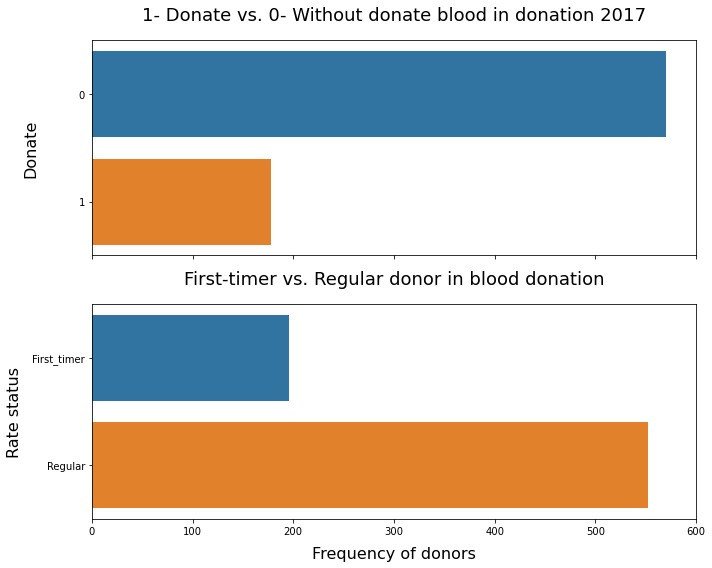

In [14]:
# Creating subplots figure
fig, ax = plt.subplots(2, 1, figsize = (10, 8), sharex = True)

# Countplot of decision on blood donation 2017 against frequency of donor
sns.countplot(y = df['donate'], ax = ax[0])
ax[0].set_title('1- Donate vs. 0- Without donate blood in donation 2017',
               fontsize = 18, pad = 20)
ax[0].set_xlabel('')
ax[0].set_ylabel('Donate', labelpad = 40, fontsize = 16)

# Countplot of rate status of donor against the frequency of donor
sns.countplot(y = df['rate_status'], ax = ax[1],
              order = df['rate_status'].value_counts(ascending = True).index)
ax[1].set_title('First-timer vs. Regular donor in blood donation',
               fontsize = 18, pad = 20)
ax[1].set_xlabel('Frequency of donors', labelpad = 10, fontsize = 16)
ax[1].set_ylabel('Rate status', labelpad = 10, fontsize = 16)
ax[1].set_xlim(0, 600)

plt.tight_layout()
plt.show()

We will also demostrate the difference between the frequency of donors when given `donate` and `rate_status` as well.

In [15]:
df.groupby(['donate','rate_status']).count()

recency_month  frequency  blood_cc  time_month  rate
donate rate_status                                                      
0      First_timer            167        167       167         167   167
       Regular                403        403       403         403   403
1      First_timer             29         29        29          29    29
       Regular                149        149       149         149   149

The main use of countplot can also separate the categorical data into more detailed, so we can compare counts across the nested variables here. For example here, counting the frequency of donors with `rate_status` and `donate` separetely.

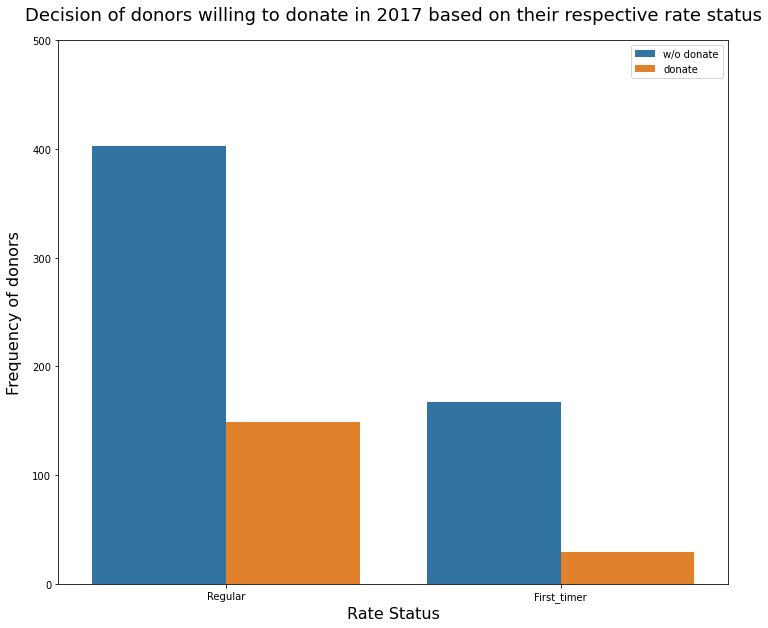

In [16]:
# Countplot of decision on blood donation in 2017 based on rate status
sns.countplot(x = df['rate_status'], hue = df["donate"])

plt.xlabel("Rate Status", fontsize = 16)
plt.ylabel("Frequency of donors", labelpad =  10, fontsize = 16)
plt.ylim(0, 500)
plt.legend(['w/o donate', 'donate'])
plt.title("Decision of donors willing to donate in 2017 based on their respective rate status",
          fontsize = 18, pad = 20)

fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

For another example, we can also categorize `freqeuncy` by dividing the entire range of values into a series of intervals.

We know that the maximum `frequency` is not more than 50. Here we use 5 intervals ...
1. (0, 10] 
2. (10, 20] 
3. (20, 30] 
4. (30, 40] 
5. (40, 50] 

In [17]:
# Define new dataframe with grouped frequency
df_grouped = df[['frequency','donate']]
df_grouped['range'] = ""

# Get rows and columns
row, col = df_grouped.shape

for i in range(row):
    if df_grouped.iloc[i,0] <= 10:
        df_grouped.iloc[i,2] = '(0, 10]'
    elif 10 < df_grouped.iloc[i,0] <= 20:
        df_grouped.iloc[i,2] = '(10, 20]'
    elif 20 < df_grouped.iloc[i,0] <= 30:
        df_grouped.iloc[i,2] = '(20, 30]'    
    elif 30 < df_grouped.iloc[i,0] <= 40:
        df_grouped.iloc[i,2] = '(30, 40]'
    elif 40 < df_grouped.iloc[i,0] <= 50:
        df_grouped.iloc[i,2] = '(40, 50]'
    else:
        math.nan

# Rearrange the columns
df_grouped = df_grouped[['frequency','range','donate']]
df_grouped = df_grouped.sort_values('frequency')
df_grouped.head()

,frequency,range,donate
747,1,"(0, 10]",0
170,1,"(0, 10]",0
171,1,"(0, 10]",0
172,1,"(0, 10]",0
173,1,"(0, 10]",0


In [18]:
# Check if there is any value that is not between 0 to 50 (NaN)
df_grouped['range'].isnull().any()

False

We can find the counts of frequency of blood donation with the condition of `range` and `donate` by using the `groupby()` function.

In [19]:
df_grouped.groupby(['range','donate']).count()

frequency
range    donate           
(0, 10]  0             505
         1             140
(10, 20] 0              58
         1              28
(20, 30] 0               5
         1               4
(30, 40] 0               1
         1               2
(40, 50] 0               1
         1               4

By plotting the countplot of freqeuncy of donors corresponds to the interval of frequency of donation, `range` and decision of donation in 2017, `donate` separately.

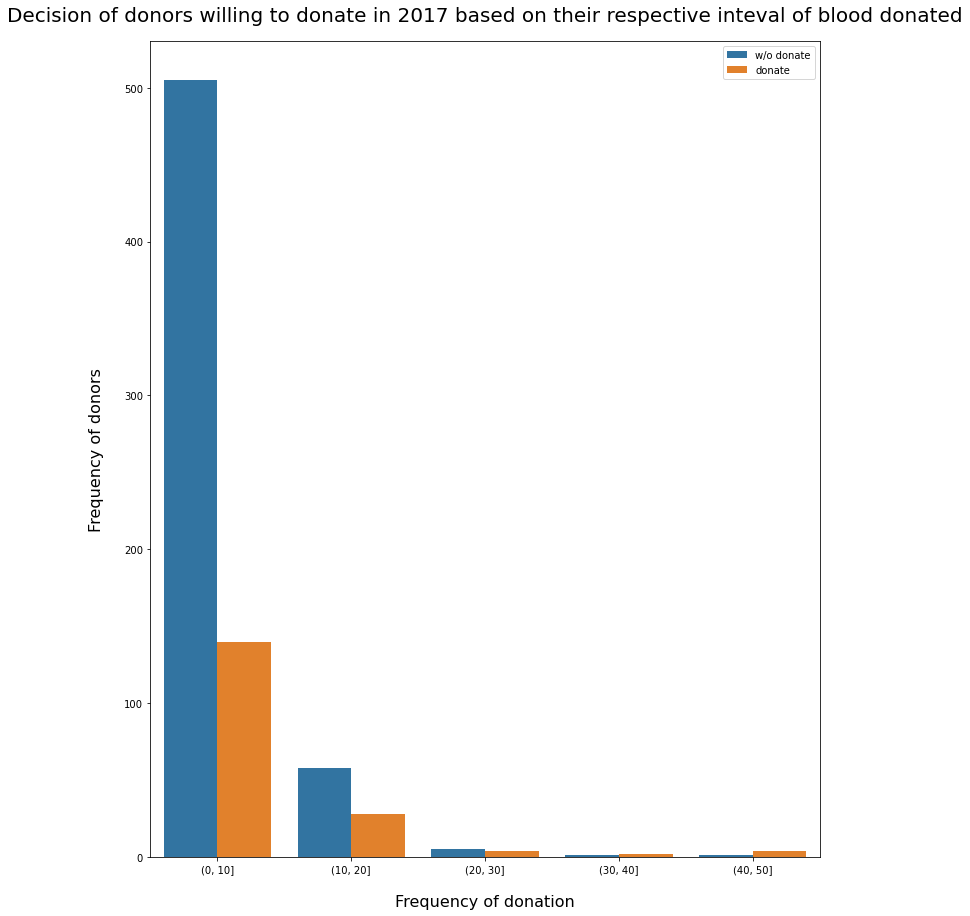

In [20]:
# Countplot of decision on blood donation in 2017 based on respective interval blood donated
sns.countplot(x= 'range', hue= 'donate', data= df_grouped)

# Adjusting figure size
fig = plt.gcf()
fig.set_size_inches(12, 15)

plt.title("Decision of donors willing to donate in 2017 based on their respective inteval of blood donated",
         fontsize=20, pad=20)
plt.xlabel("Frequency of donation",labelpad=20, fontsize=16)
plt.ylabel("Frequency of donors",labelpad=20, fontsize=16)
plt.legend(['w/o donate','donate'])

plt.show()


# Heatmap
---

Heatmap plotting can be useful for visualizing correlation matrices. In our visualization, we can show that whether the variables or features are they interdependence. 

Since heatmap is a two-dimensional matrix, each cell in the matrix indicates the correlation between the particular variable based on specified row and specified column.

In [21]:
# Identify the correlation between each variables
corr_matrix = df.corr()
corr_matrix

,recency_month,frequency,blood_cc,time_month,donate,rate
recency_month,1.000000,-0.182745,-0.182745,0.160618,-0.279869,-0.051441
frequency,-0.182745,1.000000,1.000000,0.634940,0.218633,0.031779
blood_cc,-0.182745,1.000000,1.000000,0.634940,0.218633,0.031779
time_month,0.160618,0.634940,0.634940,1.000000,-0.035854,0.592473
donate,-0.279869,0.218633,0.218633,-0.035854,1.000000,-0.087510
rate,-0.051441,0.031779,0.031779,0.592473,-0.087510,1.000000


Notice that `rate_status` is not numeric, therefore the value is elimanated from the correlation matrix.

Here we have a way to solve this, we can extract `rate_status` by classification. By dummifying the `rate_status` into new two columns, which is `First_timer` and `Regular`. Now, we are able to calculate the correlation of `rate_status` as well,

In [22]:
# Dummify rate_status
df_dummy = pd.get_dummies(df['rate_status'])

# Concatenate respecting along column-wise
df_heat = pd.concat([df, df_dummy], axis = 1)
df_heat.head()

,recency_month,frequency,blood_cc,time_month,donate,rate,rate_status,First_timer,Regular
0,2,50,12500,98,1,1.920000,Regular,0,1
1,0,13,3250,28,1,2.153846,Regular,0,1
2,1,16,4000,35,1,2.125000,Regular,0,1
3,2,20,5000,45,1,2.150000,Regular,0,1
4,1,24,6000,77,0,3.166667,Regular,0,1


The new correlation matrix is replaced after dummified `rate_status`.

In [23]:
# Update the correlation matrix
corr_matrix = df_heat.corr()
corr_matrix

,recency_month,frequency,blood_cc,time_month,donate,rate,First_timer,Regular
recency_month,1.000000,-0.182745,-0.182745,0.160618,-0.279869,-0.051441,0.161477,-0.161477
frequency,-0.182745,1.000000,1.000000,0.634940,0.218633,0.031779,-0.432363,0.432363
blood_cc,-0.182745,1.000000,1.000000,0.634940,0.218633,0.031779,-0.432363,0.432363
time_month,0.160618,0.634940,0.634940,1.000000,-0.035854,0.592473,-0.550907,0.550907
donate,-0.279869,0.218633,0.218633,-0.035854,1.000000,-0.087510,-0.125950,0.125950
rate,-0.051441,0.031779,0.031779,0.592473,-0.087510,1.000000,-0.539487,0.539487
First_timer,0.161477,-0.432363,-0.432363,-0.550907,-0.125950,-0.539487,1.000000,-1.000000
Regular,-0.161477,0.432363,0.432363,0.550907,0.125950,0.539487,-1.000000,1.000000


The correlation matrix has repeating values about the upper and lower triangle. To eliminate the redundant values, we can create an upper triangle matrix with data type in boolean by using `np.triu_indices_from()` and assining into **`True`**.

In [24]:
# Obtain an upper triangle matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

Some important attributes for heatmap, the followings are: 

`mask` - data will not be shown in cells where it is **`True`**

`square` - squared-shaped if **`True`**

`vmin` - limit at negatively correlated (-1)

`vmax` - limit at positvely correlated (+1)

`annot` - annotation for correlation 

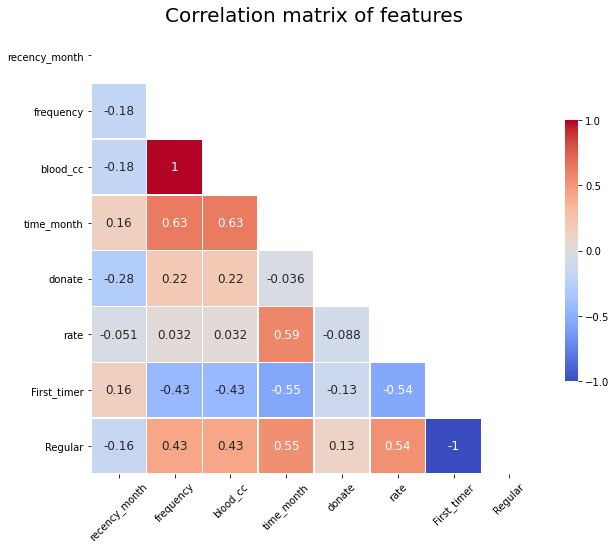

In [25]:
# Plotting heatmap
f,ax = plt.subplots(figsize = (10, 12))
heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size":12})

ax.set_yticklabels(corr_matrix.columns)
ax.set_xticklabels(corr_matrix.columns, rotation = 45)
ax.set_title("Correlation matrix of features", fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

plt.show()